# Generate Data 

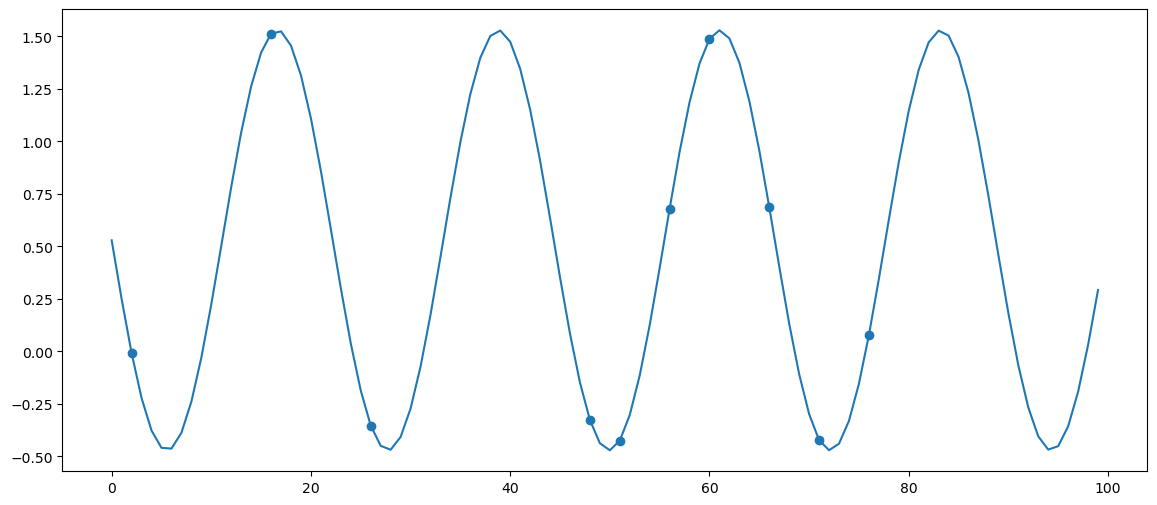

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    eps = 0.3
    scale = MAX_N / 4
    return np.sin(scale * x) + np.random.randn(1)*eps


def sample_sin(N=30, MAX_N=100, seed=0):
    np.random.seed(seed)
    
    X = np.arange(MAX_N)
    Y = f(X)
    
    some_X = np.random.choice(X, N, replace=False)
    some_Y = Y[some_X]
    return X.reshape(-1, 1), Y.reshape(-1, 1), some_X.reshape(-1, 1), some_Y.reshape(-1, 1)


MAX_N = 24

X, Y, some_X, some_Y = sample_sin(N=10)

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(X, Y)
ax.scatter(some_X, some_Y)

# GP

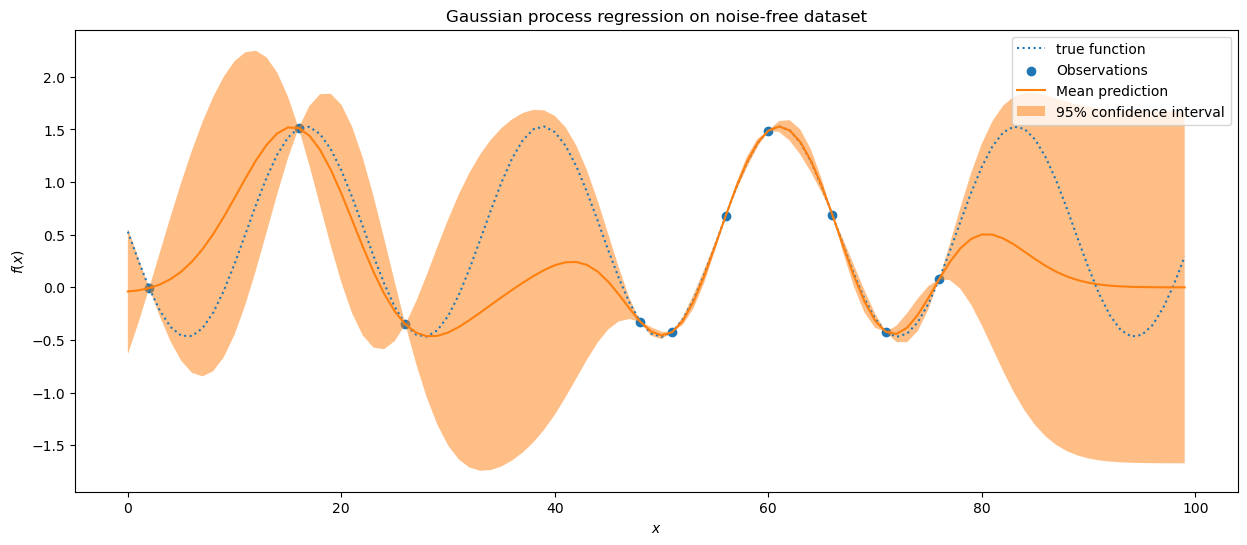

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X_train, y_train = some_X, some_Y
y = Y

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)


# plot GP
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(X, y, label=r"true function", linestyle="dotted")
ax.scatter(X_train, y_train, label="Observations")
ax.plot(X, mean_prediction, label="Mean prediction")
ax.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")
plt.show()

# Kernel Ridge Regression

In [3]:
######## Deterministic ########

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
)

# kr = KernelRidge(kernel="rbf", gamma=0.1)
kr.fit(X_train, y_train)
kr_pred = kr.predict(X)

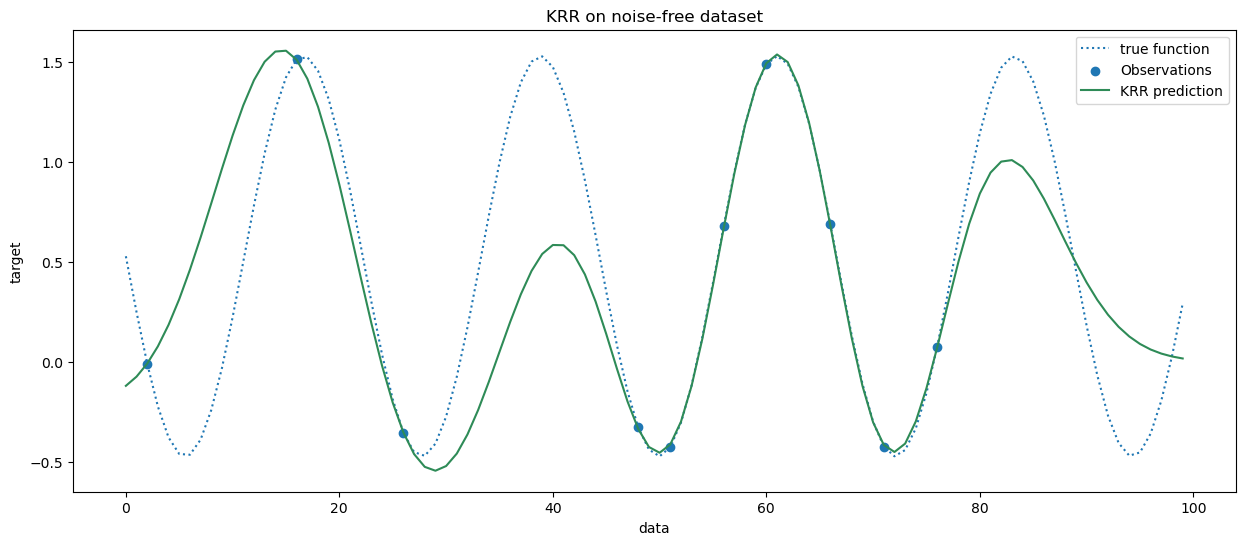

In [17]:
# plot KRR

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(X, y, label=r"true function", linestyle="dotted")
ax.scatter(X_train, y_train, label="Observations")
ax.plot(X, kr_pred, label="KRR prediction", color='seagreen')
plt.legend()
plt.xlabel("data")
plt.ylabel("target")
plt.title("KRR on noise-free dataset")
plt.show()

# GP vs. KRR

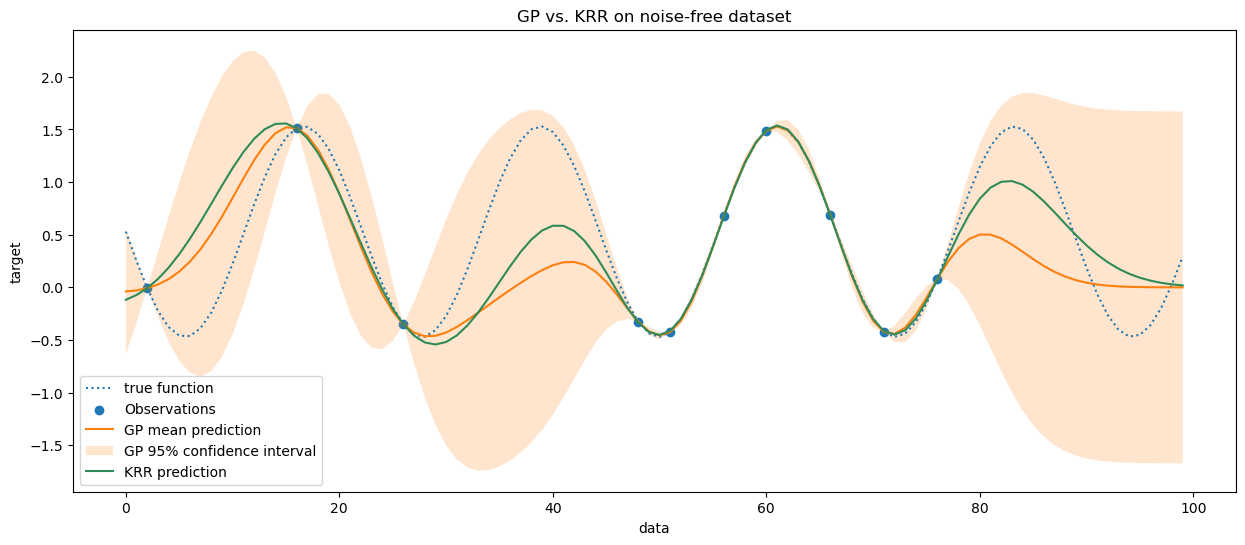

In [16]:
# plot both

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(X, y, label=r"true function", linestyle="dotted")
ax.scatter(X_train, y_train, label="Observations")

# GP
ax.plot(X, mean_prediction, label="GP mean prediction")
ax.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.2,
    label=r"GP 95% confidence interval",
)

# KRR
ax.plot(X, kr_pred, label="KRR prediction", color='seagreen')

ax.legend()
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title("GP vs. KRR on noise-free dataset")